In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.sample(10).style.background_gradient(cmap='rainbow')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
267,city,2016,8.350000,9.400000,19434,Diesel,Dealer,Manual,0
282,city,2014,8.250000,14.000000,63000,Diesel,Dealer,Manual,0
231,verna,2017,9.250000,9.400000,15001,Petrol,Dealer,Manual,0
16,ertiga,2015,7.250000,10.790000,41678,Diesel,Dealer,Manual,0
78,corolla altis,2010,5.250000,22.830000,80000,Petrol,Dealer,Automatic,0
71,corolla altis,2011,4.500000,12.480000,45000,Diesel,Dealer,Manual,0
95,corolla altis,2012,5.850000,18.610000,72000,Petrol,Dealer,Manual,0
93,fortuner,2015,23.000000,30.610000,40000,Diesel,Dealer,Automatic,0
192,Hero Hunk,2007,0.200000,0.750000,49000,Petrol,Individual,Manual,1
70,etios liva,2014,3.950000,6.760000,71000,Diesel,Dealer,Manual,0


In [5]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [15]:
df.duplicated().sum()

2

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(299, 9)

In [18]:
df.Selling_type.value_counts().sort_index()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [19]:
df.Transmission.value_counts().sort_index()

Transmission
Automatic     39
Manual       260
Name: count, dtype: int64

In [20]:
df.Fuel_Type.value_counts().sort_index()

Fuel_Type
CNG         2
Diesel     58
Petrol    239
Name: count, dtype: int64

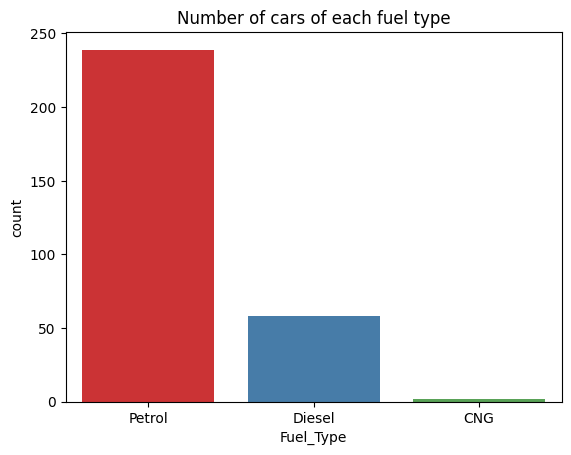

In [28]:
sns.countplot(x='Fuel_Type',data=df,palette='Set1')
plt.title('Number of cars of each fuel type')
plt.show()

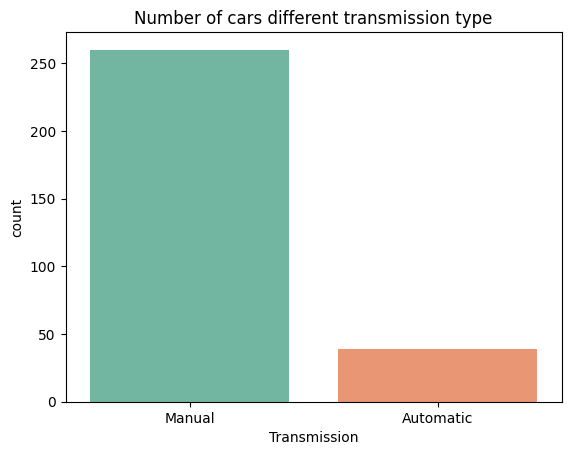

In [29]:
sns.countplot(x='Transmission',data=df,palette='Set2')
plt.title('Number of cars different transmission type')
plt.show()

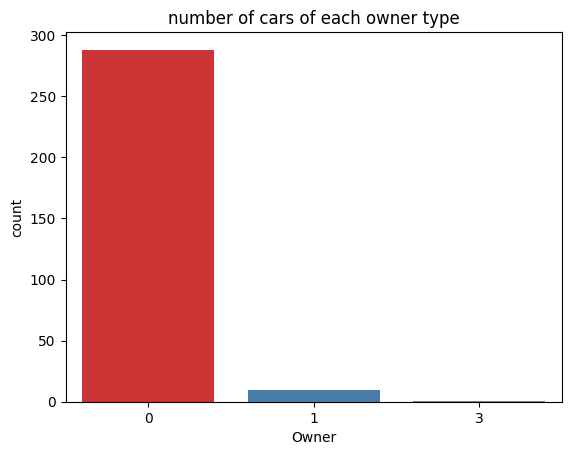

In [33]:
sns.countplot(x='Owner',data=df,palette='Set1')
plt.title('number of cars of each owner type')
plt.show()

In [34]:
df.replace({'Fuel_Type':{'CNG':0,'Diesel':1,'Petrol':2}},inplace=True)
df.replace({'Selling_type':{'Individual':0,'Dealer':1}},inplace=True)
df.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)

In [35]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,1,1,0
1,sx4,2013,4.75,9.54,43000,1,1,1,0
2,ciaz,2017,7.25,9.85,6900,2,1,1,0
3,wagon r,2011,2.85,4.15,5200,2,1,1,0
4,swift,2014,4.60,6.87,42450,1,1,1,0


In [110]:
df.dtypes

Car_Name          object
Year             float64
Selling_Price    float64
Present_Price    float64
Driven_kms       float64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

<Axes: xlabel='Year'>

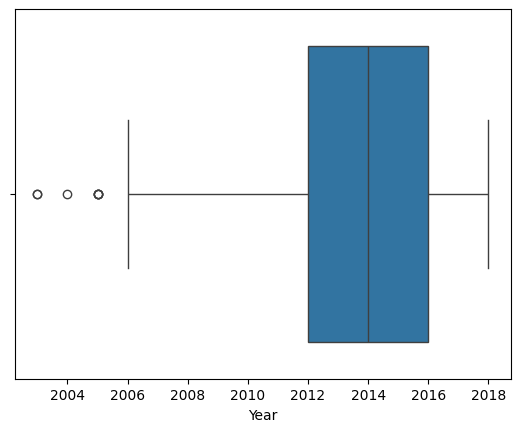

In [37]:
sns.boxplot(x='Year',data=df)

In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
lowage,uppage=remove_outlier(df['Year'])
df['Year']=np.where(df['Year']>uppage,uppage,df['Year'])
df['Year']=np.where(df['Year']<lowage,lowage,df['Year'])
                             

<Axes: xlabel='Year'>

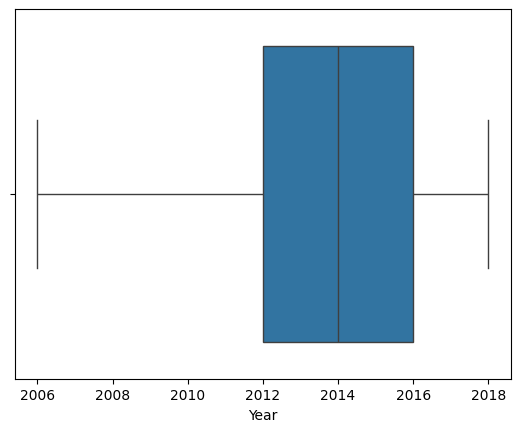

In [40]:
sns.boxplot(x='Year',data=df)

<Axes: xlabel='Selling_Price'>

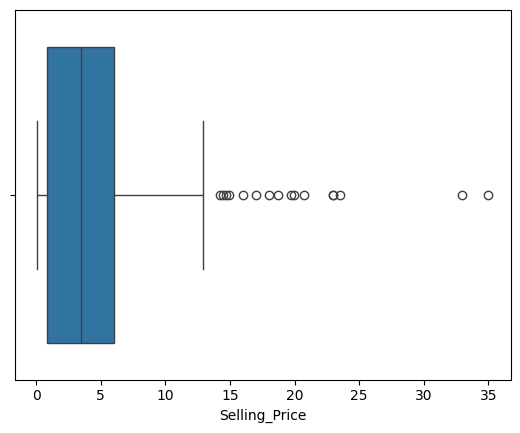

In [41]:
sns.boxplot(x='Selling_Price',data=df)

In [42]:
lowage,uppage=remove_outlier(df['Selling_Price'])
df['Selling_Price']=np.where(df['Selling_Price']>uppage,uppage,df['Selling_Price'])
df['Selling_Price']=np.where(df['Selling_Price']<lowage,lowage,df['Selling_Price'])
                             

<Axes: xlabel='Selling_Price'>

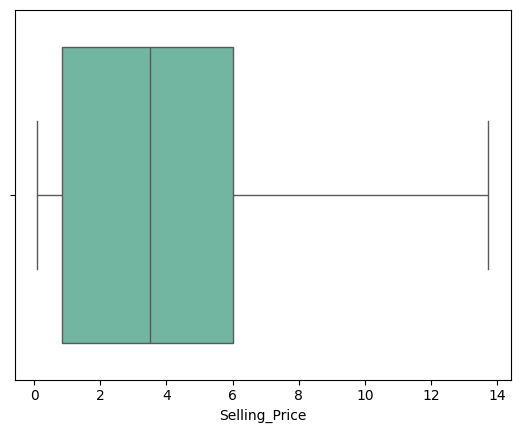

In [44]:
sns.boxplot(x='Selling_Price',data=df,palette='Set2')

<Axes: xlabel='Present_Price'>

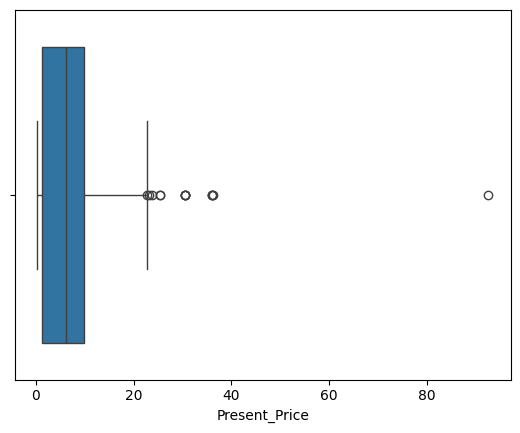

In [46]:
sns.boxplot(x='Present_Price',data=df)

In [47]:
lowage,uppage=remove_outlier(df['Present_Price'])
df['Present_Price']=np.where(df['Present_Price']>uppage,uppage,df['Present_Price'])
df['Present_Price']=np.where(df['Present_Price']<lowage,lowage,df['Present_Price'])

<Axes: xlabel='Present_Price'>

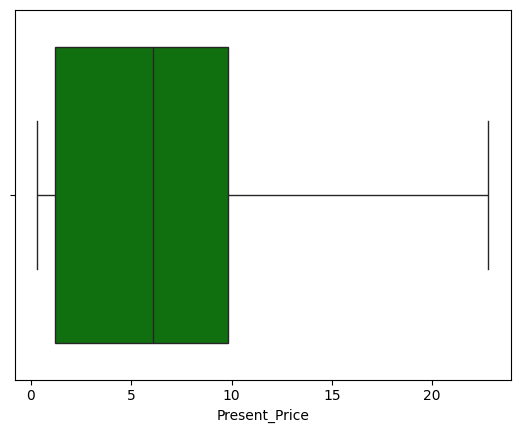

In [48]:
sns.boxplot(x='Present_Price',data=df,color='Green')

<Axes: xlabel='Driven_kms'>

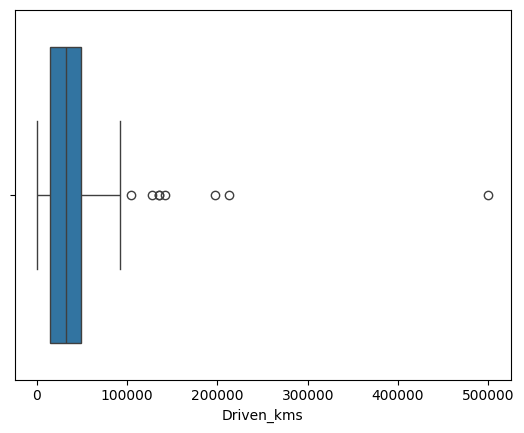

In [50]:
sns.boxplot(x='Driven_kms',data=df)

In [51]:
lowage,uppage=remove_outlier(df['Driven_kms'])
df['Driven_kms']=np.where(df['Driven_kms']>uppage,uppage,df['Driven_kms'])
df['Driven_kms']=np.where(df['Driven_kms']<lowage,lowage,df['Driven_kms'])

<Axes: xlabel='Driven_kms'>

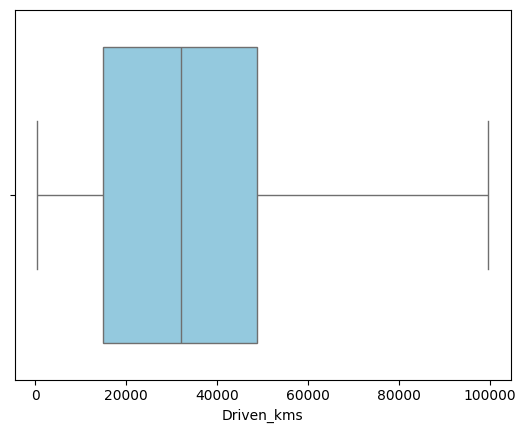

In [52]:
sns.boxplot(x='Driven_kms',data=df,color='skyblue')

In [54]:
y=df['Selling_Price']
x=df.drop(['Car_Name','Selling_Price'],axis=1)

In [55]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=60)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr=LinearRegression()

In [89]:
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
lr.score(x_train,y_train)

0.8947697616955324

In [91]:
lr.score(x_test,y_test)

0.83774962461565

In [100]:
y_pred = lr.predict(x_train)

In [95]:
from sklearn import metrics

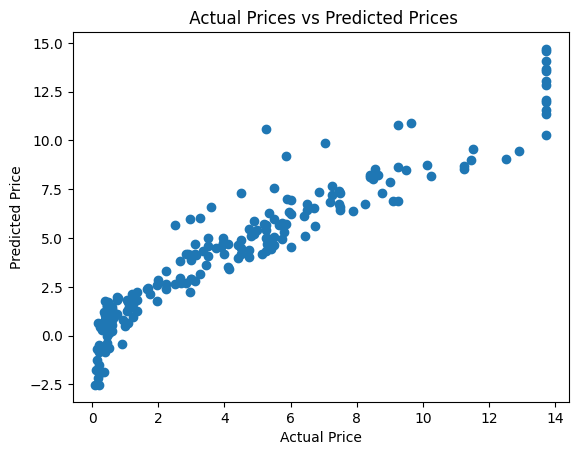

In [101]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

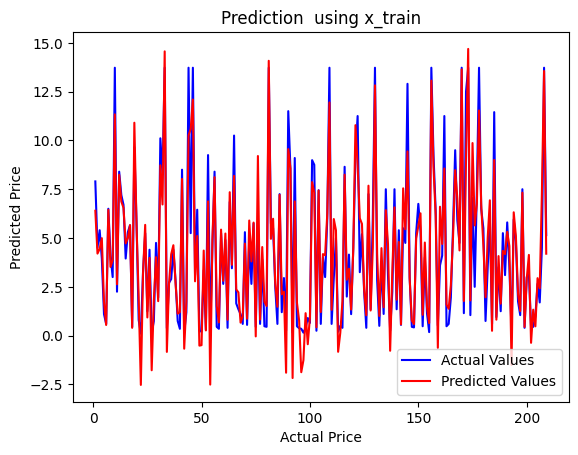

In [107]:
c = [i for i in range (1,len(y_train)+1,1)]
plt.plot(c,y_train,color='b',linestyle='-',label="Actual Values")
plt.plot(c,y_pred,color='r',linestyle='-',label="Predicted Values")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction  using x_train')
plt.legend()
plt.show()